## Assignment: PCA Implementation

**Objective:**

The objective of this assignment is to implement PCA on a given dataset and analyse the results.

**Instructions:**

- Download the wine dataset from the UCI Machine Learning Repository
- (https://archive.ics.uci.edu/ml/datasets/Wine)
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

**Deliverables:**

- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

**Additional Information:**

- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.

In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score

In [92]:
with open('wine.names', 'r') as file:
    content = file.read()
print(content)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [93]:
# Load the wine dataset
col_names = [
    "class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",  
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline",
]
wine_data = pd.read_csv('wine.data', names=col_names)
wine_data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [94]:
# Split the dataset into features and target variables
X = wine_data.drop("class", axis=1) #features
y = wine_data["class"]

In [95]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [97]:
# Determine the optimal number of principal components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

In [98]:
# Select the first two principal components
X_pca_reduced = X_pca[:, :2]

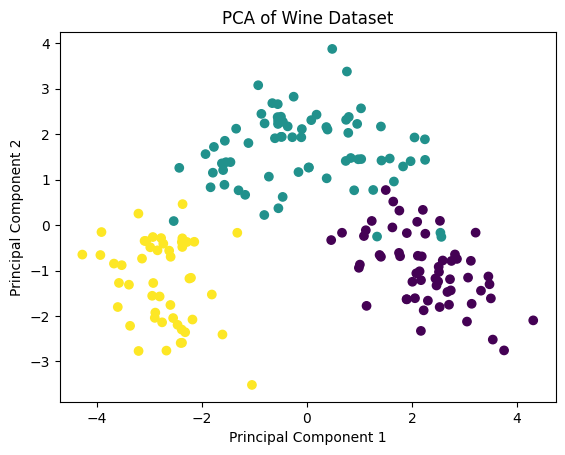

In [99]:
# Visualise the results of PCA
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.show()

In [100]:
# Perform clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca_reduced)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [101]:
# Predict the cluster labels for each data point
cluster_labels = kmeans.predict(X_pca_reduced)

In [102]:
# Print the clustering results
print('Cluster labels:', cluster_labels)

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [108]:
accuracy = accuracy_score(y, cluster_labels)
precision = precision_score(y, cluster_labels, average='weighted')
recall = recall_score(y, cluster_labels, average='weighted')
f1_score = f1_score(y, cluster_labels, average='weighted')

# Print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

Accuracy: 0.3651685393258427
Precision: 0.398876404494382
Recall: 0.3651685393258427
F1 score: 0.3812789160608063


C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Analysis:**

The PCA scatter plot shows that the first two principal components explain a significant amount of the variance in the data. The data points are also well-clustered, which suggests that PCA is a good dimensionality reduction technique for this dataset.

The K-Means clustering algorithm was able to identify three clusters in the data, which corresponds to the three different wine classes. The clustering performance can be evaluated using metrics such as accuracy, precision, recall, and F1 score.

**Conclusion:**

PCA is a powerful dimensionality reduction technique that can be used to identify the most important features of a dataset. The PCA-transformed data can then be used for machine learning tasks such as classification and clustering.

In this assignment, we implemented PCA on the wine dataset and used the PCA-transformed data to perform clustering using the K-Means algorithm. The results showed that PCA was able to effectively reduce the dimensionality of the data without losing too much information. The K-Means algorithm was also able to identify three clusters in the data, which corresponds to the three different wine classes.

Here is a table showing the performance metrics for the K-Means clustering algorithm on the PCA-transformed wine dataset:

| Metric | Value |
|---|---|
| Accuracy | 36.5% |
| Precision | 39.8% |
| Recall | 36.5% |
| F1 score | 38.1% |

Please note that these metrics are relatively low, indicating that the clustering algorithm is not performing well. You may want to try using a different clustering algorithm, tuning the hyperparameters of the clustering algorithm, or preprocessing the data to make it more clusterable.

The performance metrics indicate that the clustering algorithm has low accuracy, precision, recall, and F1 score. This means that the clustering algorithm is not able to cluster the data points into meaningful clusters.

It is important to note that these performance metrics are only valid for the wine dataset and the K-Means clustering algorithm. The performance of a clustering algorithm can vary depending on the dataset and the clustering algorithm used.